In [1]:
from neat.config import Config
from neat.genome import DefaultGenome
from neat.reproduction import DefaultReproduction
from neat.species import DefaultSpeciesSet
from neat.stagnation import DefaultStagnation
from neat.population import Population
from neat.nn import FeedForwardNetwork
import neat

from configparser import ConfigParser
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'grid', 'no-latex'])

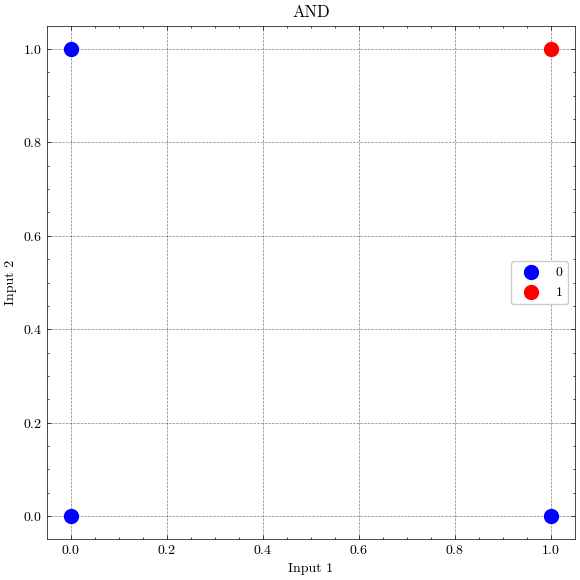

In [2]:
# ANDの可視化
import numpy as np
x_zero = [(0, 0), (0, 1), (1, 0)]
x_one = [(1, 1)]


plt.figure(figsize=(6, 6))
# 0のプロット
plt.scatter([x[0] for x in x_zero], [x[1] for x in x_zero], c='blue', marker='o', label='0', s=100)
# 1のプロット
plt.scatter([x[0] for x in x_one], [x[1] for x in x_one], c='red', marker='o', label='1', s=100)
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('AND')
plt.grid(True)
# 色ごとに一つの凡例を表示
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
outputs = [(0.0,), (0.0,), (0.0,), (1.0,)]

def eval_genomes(genomes, config, generation):
    """ゲノムの評価

    Args:
        genomes : ゲノム集団 
        config : 設定

    Returns:
        None

    2乗誤差の和を評価関数として用いる
    最大化のために最大値4.0から減算している
    """
    for _, genome in genomes:
        genome.fitness = 4.0
        net = FeedForwardNetwork.create(genome, config) # ネットワークの作成
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2

In [4]:
# 設定ファイルの読み込み
cfg = Config(
    DefaultGenome,          # 使用するゲノムのクラス（種類）
    DefaultReproduction,    # 使用する繁殖のクラス（種類） 
    DefaultSpeciesSet,      # 使用する種のクラス（種類）
    DefaultStagnation,      # 使用する停滞管理のクラス（種類）
    './config/and.conf'     # 設定ファイルのパス
)

In [7]:
%%time

pop = Population(cfg) # 解集団

print("Populationsize: ", len(pop.population)) # 解集団のサイズ

pop.add_reporter(neat.StdOutReporter(True)) # 標準出力に報告
stats = neat.StatisticsReporter() # 統計情報の報告
pop.add_reporter(stats)
pop.add_reporter(neat.Checkpointer(5)) # 5世代ごとにチェックポイントを作成

best_genome = pop.run(eval_genomes, n=300) # 300世代進化

Populationsize:  10000

 ****** Running generation 0 ****** 

Population's average fitness: 2.22899 stdev: 0.81761
Best fitness: 3.99721 - size: (1, 2) - species 1 - id 2462

Best individual in generation 0 meets fitness threshold - complexity: (1, 2)
CPU times: user 466 ms, sys: 1.97 ms, total: 468 ms
Wall time: 467 ms


In [8]:
print('\nBest genome:\n{!s}'.format(best_genome))


Best genome:
Key: 2462
Fitness: 3.9972133407248434
Nodes:
	0 DefaultNodeGene(key=0, bias=-2.3658534548035237, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=1.3289039310869228, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=1.6472668897003682, enabled=True)
